In [1]:
# Change this to whatever your directory you're working from is - this should be
# the head level with Code and Data directories.
main_path = '/content/drive/MyDrive/DeepLearning_Summer2022/Final_Project/'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import keras
import numpy as np
from keras import models
from keras import layers
from keras.layers import Dropout
import random as python_random
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from google.colab import files
import sklearn.preprocessing
import scipy
from tensorflow.keras import regularizers

import sys
import importlib
import pickle

# set seeds
np.random.seed(768)
python_random.seed(869)
tf.random.set_seed(1234)

from google.colab import drive
drive.mount('/content/drive')

sys.path.append(main_path+"Code")
import vep
importlib.reload(vep)

Mounted at /content/drive


<module 'vep' from '/content/drive/MyDrive/DeepLearning_Summer2022/Final_Project/Code/vep.py'>

In [3]:
# Here's our model that we're going to be working with
def build_nn_model_3(model_val):
  
  # Build our specified model
  model = models.Sequential()
  
  l2_val = 0.025
  dropout_val = 0.4
  model.add(layers.Dense(50, input_shape=(105,),activation='relu', kernel_regularizer=regularizers.L2(l2=l2_val)))
  model.add(Dropout(dropout_val))
  model.add(layers.Dense(25, activation='relu', kernel_regularizer=regularizers.L2(l2=l2_val)))
  model.add(Dropout(dropout_val))
  model.add(layers.Dense(2, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), 
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

  nepochs = 200
  history = model.fit(model_val.X_train,
                    model_val.Y_train,
                    epochs=nepochs,
                    batch_size=512,
                    validation_data=(model_val.X_val,model_val.Y_val)
                    )
  model_val.nn_model = model
  model_val.nn_history = history
  return model, history

## Run for our clustered train/test split

In [4]:
# File path for the protein encodings dictionary
prot_enc_file = main_path+'Data/protein_full_length_encodings.pickle'

# Locations of input data with the clustered shuffling
data_dir = main_path+'Data/'
train_file = data_dir+'train_processed_clinvar_seqs_with_clusters_clustershuffle.csv'
val_file = data_dir+'validate_processed_clinvar_seqs_with_clusters_clustershuffle.csv'
test_file = data_dir+'test_processed_clinvar_seqs_with_clusters_clustershuffle.csv'

# Instantiate our Model3 class, passing in the location of the protein 
# dictionary of encodings
m3 = vep.Model3(prot_enc_file)

# Process our input and output
m3.process_input_and_output_training(train_file,val_file,test_file)

The categories are: [array(['benign', 'pathogenic'], dtype='<U10')]


In [5]:
# Let's run our model!
build_nn_model_3(m3)

Epoch 1/200
10/10 [==============================] - 1s 30ms/step - loss: 4.4048 - categorical_accuracy: 0.3965 - val_loss: 3.8625 - val_categorical_accuracy: 0.3308
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 4.1127 - categorical_accuracy: 0.4039 - val_loss: 3.6106 - val_categorical_accuracy: 0.3409
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 3.8691 - categorical_accuracy: 0.4077 - val_loss: 3.4026 - val_categorical_accuracy: 0.4015
Epoch 4/200
10/10 [==============================] - 0s 7ms/step - loss: 3.6611 - categorical_accuracy: 0.4173 - val_loss: 3.2347 - val_categorical_accuracy: 0.4293
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 3.4639 - categorical_accuracy: 0.4293 - val_loss: 3.1001 - val_categorical_accuracy: 0.4798
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 3.3469 - categorical_accuracy: 0.4473 - val_loss: 2.9889 - val_categorical_accuracy: 0.5076
Epoch 7/2

(<keras.engine.sequential.Sequential at 0x7f1edbe26150>,
 <keras.callbacks.History at 0x7f1edbe0da90>)

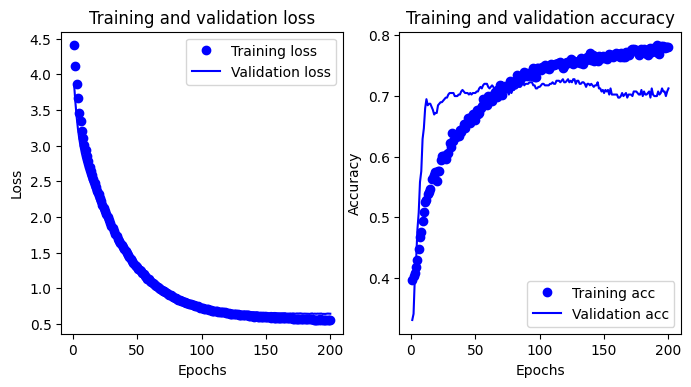

In [6]:
m3.plot_accuracy_and_loss()

In [7]:
m3.nn_model.save(main_path+'Code/Trained_Model_Weights/Model3_clustered')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DeepLearning_Summer2022/Final_Project/Code/Trained_Model_Weights/Model3_clustered/assets


In [8]:
# Get our accuracy for our test set
m3.nn_model.evaluate(m3.X_test,m3.Y_test)

21/21 [==============================] - 0s 5ms/step - loss: 0.6746 - categorical_accuracy: 0.7043


[0.6746160387992859, 0.7043343782424927]

## Now try for our random shuffling

In [9]:
# Here's our model that we're going to be working with - using a different 
# function because less obvious overfitting
def build_nn_model_3_random(model_val):
  
  # Build our specified model
  model = models.Sequential()

  #l2_val = 0.025
  l2_val = 0.025
  dropout_val = 0.4
  model.add(layers.Dense(50, input_shape=(105,),activation='relu', kernel_regularizer=regularizers.L2(l2=l2_val)))
  model.add(Dropout(dropout_val))
  model.add(layers.Dense(25, activation='relu', kernel_regularizer=regularizers.L2(l2=l2_val)))
  model.add(Dropout(dropout_val))
  model.add(layers.Dense(2, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), 
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

  nepochs = 800
  history = model.fit(model_val.X_train,
                    model_val.Y_train,
                    epochs=nepochs,
                    batch_size=512,
                    validation_data=(model_val.X_val,model_val.Y_val)
                    )
  model_val.nn_model = model
  model_val.nn_history = history
  return model, history

In [10]:
# File path for the protein encodings dictionary
prot_enc_file = main_path+'Data/protein_full_length_encodings.pickle'

# Locations of input data with the clustered shuffling
data_dir = main_path+'Data/'
train_file = data_dir+'train_processed_clinvar_seqs_random.csv'
val_file = data_dir+'validate_processed_clinvar_seqs_random.csv'
test_file = data_dir+'test_processed_clinvar_seqs_random.csv'

# Instantiate our Model3 class, passing in the location of the protein 
# dictionary of encodings
m3_rand = vep.Model3(prot_enc_file)

# Process our input and output
m3_rand.process_input_and_output_training(train_file,val_file,test_file)

The categories are: [array(['benign', 'pathogenic'], dtype='<U10')]


In [11]:
# Let's run our model!
build_nn_model_3_random(m3_rand)

Epoch 1/800
10/10 [==============================] - 1s 25ms/step - loss: 3.5436 - categorical_accuracy: 0.5390 - val_loss: 3.2592 - val_categorical_accuracy: 0.5848
Epoch 2/800
10/10 [==============================] - 0s 7ms/step - loss: 3.4359 - categorical_accuracy: 0.5285 - val_loss: 3.1498 - val_categorical_accuracy: 0.5767
Epoch 3/800
10/10 [==============================] - 0s 6ms/step - loss: 3.3028 - categorical_accuracy: 0.5324 - val_loss: 3.0571 - val_categorical_accuracy: 0.5751
Epoch 4/800
10/10 [==============================] - 0s 11ms/step - loss: 3.1696 - categorical_accuracy: 0.5471 - val_loss: 2.9714 - val_categorical_accuracy: 0.5735
Epoch 5/800
10/10 [==============================] - 0s 7ms/step - loss: 3.1139 - categorical_accuracy: 0.5362 - val_loss: 2.8924 - val_categorical_accuracy: 0.5703
Epoch 6/800
10/10 [==============================] - 0s 6ms/step - loss: 3.0066 - categorical_accuracy: 0.5463 - val_loss: 2.8196 - val_categorical_accuracy: 0.5800
Epoch 7/

(<keras.engine.sequential.Sequential at 0x7f1ed5185350>,
 <keras.callbacks.History at 0x7f1ed4f5abd0>)

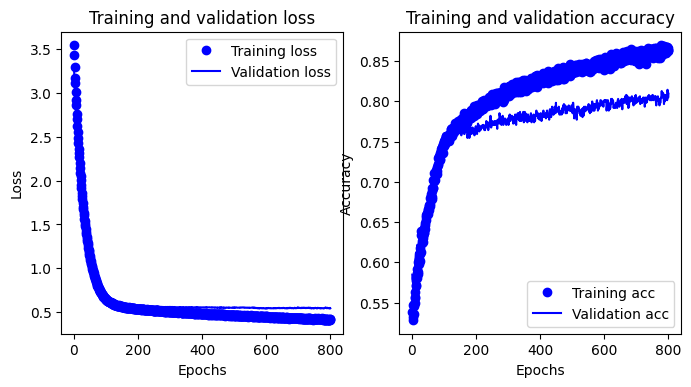

In [12]:
m3_rand.plot_accuracy_and_loss()

In [13]:
m3_rand.nn_model.save(main_path+'Code/Trained_Model_Weights/Model3_random')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DeepLearning_Summer2022/Final_Project/Code/Trained_Model_Weights/Model3_random/assets


In [14]:
# Get our accuracy for our test set
m3_rand.nn_model.evaluate(m3_rand.X_test,m3_rand.Y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.5217 - categorical_accuracy: 0.8048


[0.5217022895812988, 0.804753839969635]